# Анализ данных по датасету Titanic

На анализ поступили данные о пассажирах Титаника. В датасете имеется информация о том, выжил пассажир или нет, сколько ему лет, как его зовут, какого он пола, каким классом он путешествует, кто его сопровождает и т.д.

**Цель исследования**: составить портрет среднестатистического пассажира Титаника, определить, какие факторы повлияли на шанс пассажиров выжить. 

План исследования:

1. **Описание датасета** – ознакомимся с полями и их значениями.
2. **Изучение распределений** – построим гистограммы и столбчатые диаграммы для ключевых переменных.
3. **Заполнение пропусков** – исследуем, где имеются пропуски, и предложим стратегию их заполнения.
4. **Отношения между переменными** – изучим корреляции и построим scatter plot’ы.
5. **Портрет пассажиров разных классов** – сравним характеристики пассажиров по классам.
6. **Тестирование гипотез** – проверим, как разные факторы влияют на шанс выжить, используя хи-квадрат тест.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

## 1. Описание датасета

Датасет содержит информацию о пассажирах Титаника. Ниже приведена таблица с описанием полей:

| Переменная    | Описание                                                                 |
|---------------|--------------------------------------------------------------------------|
| PassengerId   | Уникальный идентификатор пассажира                                        |
| Survived      | Выжил ли пассажир (0 = нет, 1 = да)                                       |
| Pclass        | Класс каюты (1 = первый, 2 = второй, 3 = третий)                          |
| Name          | Имя пассажира                                                           |
| Sex           | Пол                                                                     |
| Age           | Возраст                                                                 |
| SibSp         | Количество братьев/сестёр или супругов на борту                         |
| Parch         | Количество родителей/детей на борту                                      |
| Ticket        | Номер билета                                                            |
| Fare          | Цена билета                                                             |
| Cabin         | Номер каюты (может быть пустым)                                         |
| Embarked      | Порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)              |


In [2]:
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Познакомимся с данными поближе, используя метод info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**ВЫВОД:**

На вход был получен датасет с данными о пассажирах Титаника, состоящий из 891 строки. Таблица содержит 12 столбцов. Первый столбец - id пассажира, все остальные столбцы представляют собой разнообразные характеристики пассажира: пол, возраст, класс каюты, наличие на корабле супруга/детей и т.д. В столбцах с возрастом пассажиров и номером каюты наблюдается большое количество пропусков. Типы данных: int64, float64, object, изменение типов данных не потребуется.  

## 2. Изучение распределений

### 2.1 Распределение возраста пассажиров в зависимости от пола и класса каюты

Перед тем, как изучать распределение пассажиров по возрастным группам в зависимости от пола и класса кают, изучим, пропорцию , в которой пассажиры относятся к тому или иному полу/классу, а также общее распределение пассажиров по возрасту.

#### 2.1.1 Распределение пассажиров по полу, возрасту и классам

Распределение пассажиров по полу и классам визуализируем через круговые диаграммы:

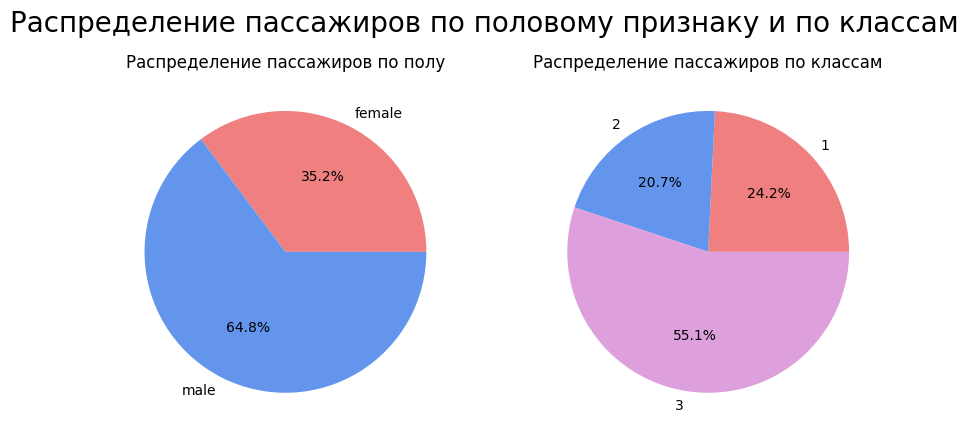

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sex_share=df.groupby(by='Sex')['PassengerId'].count().reset_index()

sex_colors = {'male': 'cornflowerblue','female': 'lightcoral'}
colors1 = [sex_colors[sex] for sex in sex_share['Sex']]


sex_share['PassengerId'].plot(ax=axs[0], labels=sex_share['Sex'], kind='pie', autopct='%.1f%%', colors=colors1)
axs[0].set(ylabel='', title='Распределение пассажиров по полу')

class_share=df.groupby(by='Pclass')['PassengerId'].count().reset_index()

class_colors = { 1: 'lightcoral', 2: 'cornflowerblue', 3: 'plum' }
colors2 = [class_colors[cl] for cl in class_share['Pclass']]

class_share['PassengerId'].plot(ax=axs[1], labels=class_share['Pclass'], kind='pie', autopct='%.1f%%', 
                    colors=colors2)
axs[1].set(ylabel='', title='Распределение пассажиров по классам')

fig.suptitle('Распределение пассажиров по половому признаку и по классам', size=20);

Мужчин на борту значительно больше, чем женщин - 64.8% мужчин против 35.2% женщин. Больше половины всех пассажиров принадлежат к 3 классу. Пассажиров 1 и 2 класса примерно поровну. 

Покажем также эту информацию в виде столбчатых диаграмм:

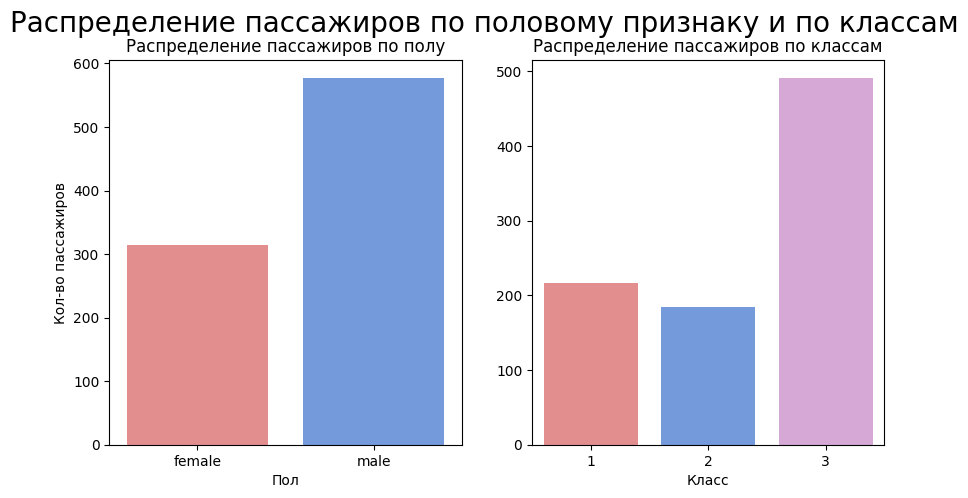

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(ax=axs[0], data=sex_share, x=sex_share['Sex'], hue='Sex',
            y=sex_share['PassengerId'], palette={'female': 'lightcoral', 'male': 'cornflowerblue'})

axs[0].set(ylabel='Кол-во пассажиров', xlabel='Пол',title='Распределение пассажиров по полу')


sns.barplot(ax=axs[1], data=class_share, x=class_share['Pclass'], hue='Pclass',
            y=class_share['PassengerId'], palette={1: 'lightcoral', 2: 'cornflowerblue', 3: 'plum'}, legend=False)

axs[1].set(ylabel='', xlabel='Класс', title='Распределение пассажиров по классам')

fig.suptitle('Распределение пассажиров по половому признаку и по классам', size=20);

Столбчатые диаграммы сделали разницу между категориями более наглядной.


Теперь посмотрим, как пассажиры были распределены по возрасту. Для этого построим гистограмму:

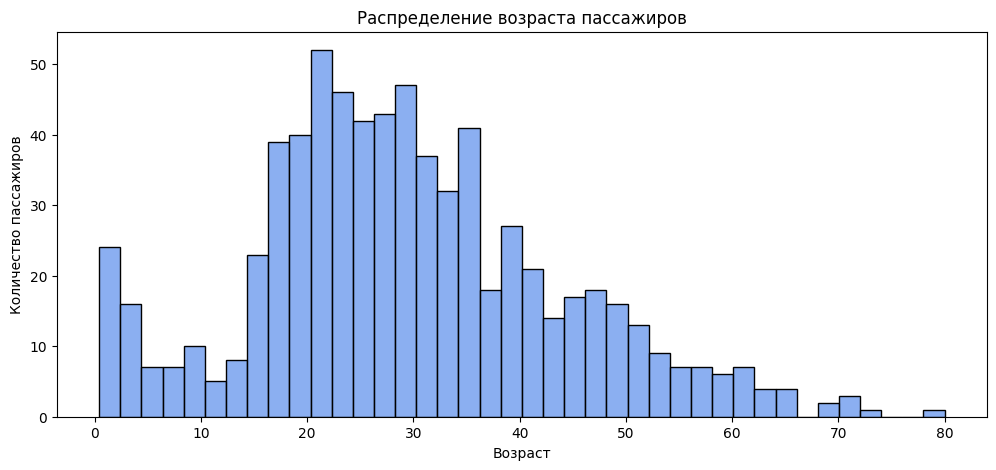

In [6]:
plt. figure(figsize=(12, 5))
sns.histplot(data=df, x='Age',color='cornflowerblue', bins=40)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

Наиболее распространенный возраст среди пассажиров составляет примерно от 16 до 36 лет. Таким образом, пассажиры Титаника были преимущественно молодыми людьми. Также на корабле присутствует достаточно большое колиечество детей и людей среднего возраста. Пожилых людей старше 65 практически не присутсвовало.

#### 2.1.2 Распределение пассажиров по возрасту в зависимости от пола и класса

Теперь установим, как распределены пассажиры разного возраста, в зависимости от пола. Построим гистограмму:

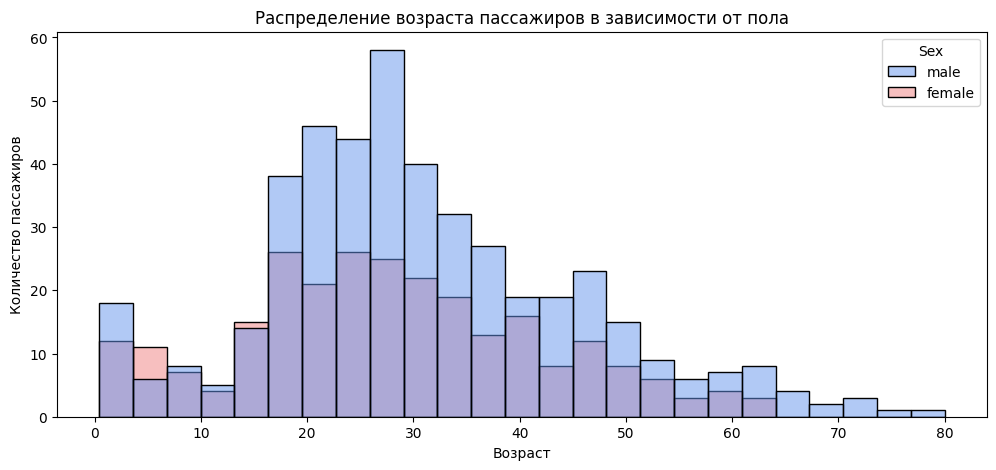

In [7]:
plt. figure(figsize=(12, 5))
sns.histplot(data=df, x='Age', hue='Sex',palette={"male": "cornflowerblue", "female": "lightcoral"}, bins=25)
plt.title('Распределение возраста пассажиров в зависимости от пола')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

Согласно получившемуся графику, количество мужчин-пассажиров почти во всех возрастных группах превышает количество женщин. В некоторых возрастных группах - старше 65 лет, женщин-пассажиров вообще нет. Превалируют женщины всего лишь в двух возрастных категориях:возраст около 5 и 12-15 лет. В целом, на борту присутствуют пассажиры в возрасте от 0 до 80 лет.

Теперь установим, как распределены пассажиры разного возраста, в зависимости от класса каюты. Для большей наглядности, построим три гистограммы - по одной на класс:

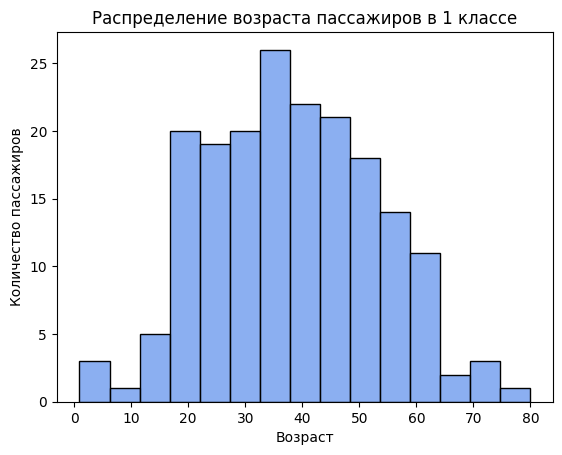

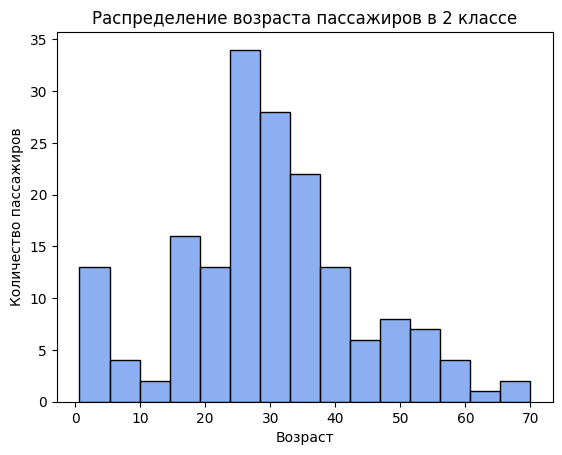

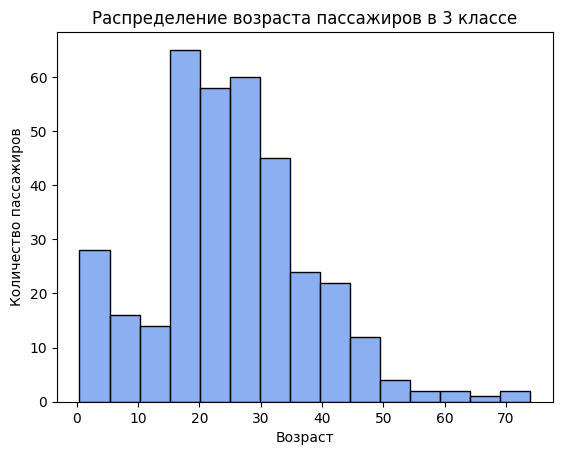

In [8]:
for pclass in df['Pclass'].sort_values().unique():
    sns.histplot(df.loc[df['Pclass']==pclass], x='Age', color='cornflowerblue', bins=15)
    plt.title(f'Распределение возраста пассажиров в {pclass} классе')
    plt.ylabel('Количество пассажиров')
    plt.xlabel('Возраст')
    plt.show()

Пассажиры 1ого класса в возрасте от 20 до 50 лет распределены примерно одинаково: наибольшее число пассажиров кают этого класса являются людьми молодого и среднего возраста. Пассажиров с детьми в этом классе меньше, чем в двух других. Пожилых людей в возрасте старше 65 лет очень мало. Самому пожилому пассажиру первого класса не больше 80 лет.

Во 2ом классе преобладают пассажиры в возрасте от 25 до 40 лет. Также в этом  классе наблюдается большое число пассажиров с детьми. Самому пожилому пассажиру 2ого класса не больше 70 лет. Пассажиры в возрасте старше 45 лет распределены примерно одинаково.

3ий класс является наиболее многочисленным. В каютах этого класса находится наибольшее число пассажиров с детьми. Самая многочисленная возрастная группа здесь - возраст от 15 до 30 лет. Людей среднего и пожилого возрастно относительно меньше, чем в других классах. Наиболее пожилому пассажиру этого класса не больше 75 лет. Количество пассажиров старше 50 лет очень мало, относительно меньше, чем во всех других группах. Таким образом, 3ий класс Титаника перевозил наиболее молодых пассажиров.

### 2.2 Распределение цены билета в зависимости от класса каюты

Изучим распределение стоимости билета в зависимости от класса каюты пассажира. Для этого построим гистограмму:

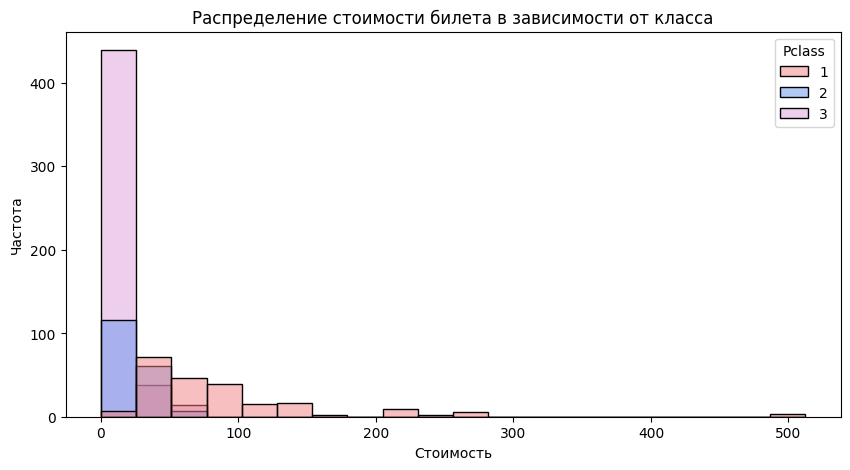

In [9]:
plt. figure(figsize=(10, 5))
sns.histplot(data=df, x='Fare', hue='Pclass', palette= {1: 'lightcoral', 2: 'cornflowerblue', 3: 'plum'}, bins=20)
plt.title('Распределение стоимости билета в зависимости от класса')
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.show()

По графику видно, что стоимость билетов в 3ий класс примерно одинакова для всех пассажиров и составляла примерно до 25 у.е. В целом, стоимость билетов в этот класс не превышала 100 у.е. Аналогично со стоимость билетов во 2ой класс. Стоимость же билетов в 1ой класс очень сильно варьировалась от минимальной, на уровне 2ого и 3его классов, до 500 у.е.

Для большей наглядности на этих данных дополнительно построим **violin plot**.

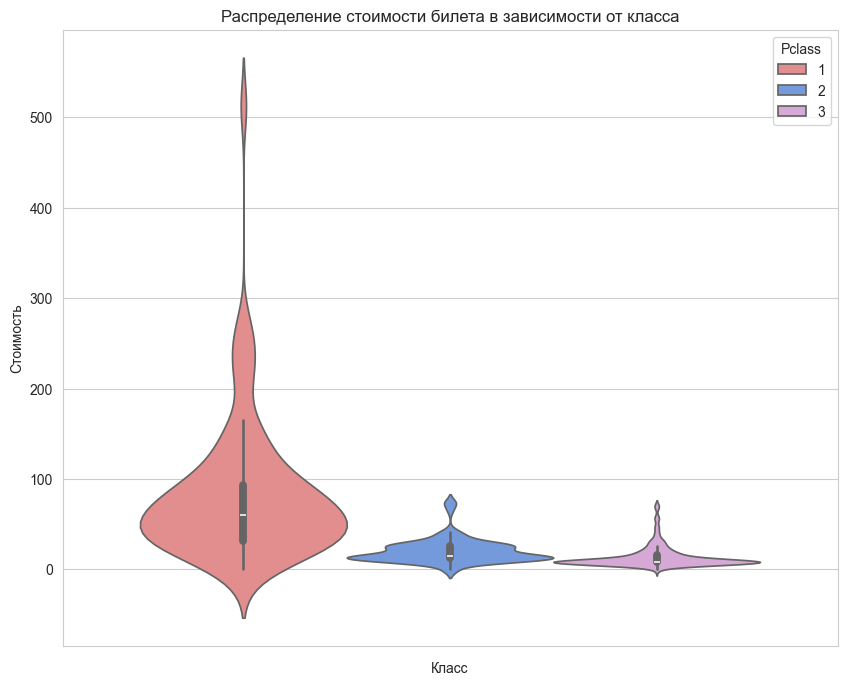

In [10]:
plt. figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.violinplot(data=df, y='Fare', hue='Pclass', palette= {1: 'lightcoral', 2: 'cornflowerblue', 3: 'plum' })
plt.title('Распределение стоимости билета в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Стоимость')

plt.show()

Стоимость билетов в 1ый класс действительно имеет больший разброс. График показал также аномальные значения для всех классов - есть выбросы стоимости в отрицательную сторону. Распределение стоимости билетов в 2ой и 3ий класс примерно одинаковое. Медианная стоимость билетов в эти классы также мало отличается. 

Чтобы сделать чуть более точные выводы, изменим масштаб графика и установим ограничения по оси y "Стоимость".

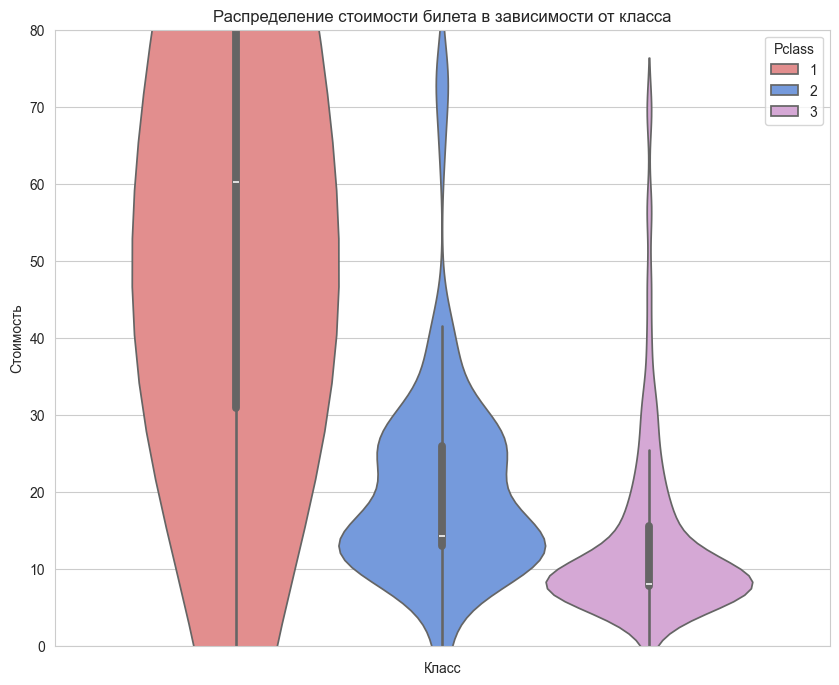

In [11]:
plt. figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.violinplot(data=df, y='Fare', hue='Pclass', palette= {1: 'lightcoral', 2: 'cornflowerblue', 3: 'plum' })
plt.title('Распределение стоимости билета в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Стоимость')
plt.ylim(0,80)

plt.show()

При таком масштабе разница между медианной стоимостью билетов в каждый класс стала более заметной. 

Медианная стоимость билетов в 1 класс составляет примерно 60 у.е. Медианная стоимость билетов во 2 составляет около 15 у.е. В 3 класс - меньше 10 у.е. 

В этом диапазоне распределение стоимости билетов в 1ом классе выглядит более равномерным. Во 2ом и 3ем классе наиболее частотные стоимости - медианные.

### 2.3 Пассажиры, путешествующие с братьями, сестрами или супругами

Посчитаем, как много пассажиров, которые путешествуют с братьями/сестрами/супругами , и в какой семье братьев, сестер или супругов больше всего. Для этого зададим новый столбец WithSibSp, в котором будет отображаться 0, если пассажир путешествует один, и 1 - если пассажир находится на корабле с братьями, сестрами или супругами:

In [12]:
df['WithSibSp'] = (df['SibSp'] > 0).astype(int)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WithSibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Теперь посчитаем, как много пассажиров путешествует с братьями/сестрами/супругами:

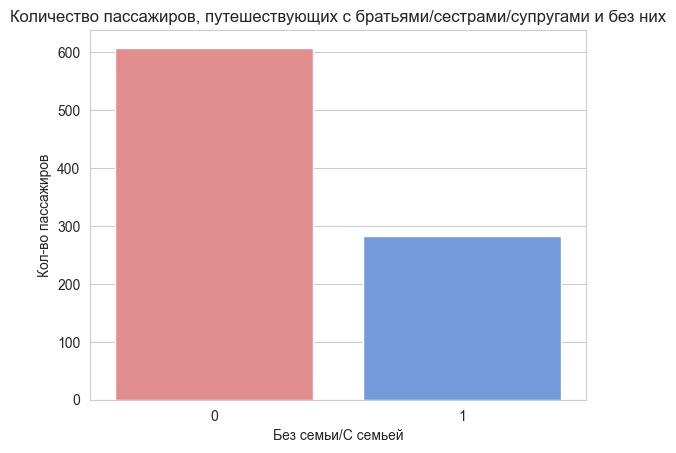

In [13]:
data = df.groupby('WithSibSp')['PassengerId'].count().reset_index()

sns.barplot(data=data, x=data['WithSibSp'], hue='WithSibSp',
            y=data['PassengerId'], palette={0: 'lightcoral', 1: 'cornflowerblue'}, legend=False)

plt.ylabel('Кол-во пассажиров')
plt.xlabel('Без семьи/С семьей')
plt.title('Количество пассажиров, путешествующих с братьями/сестрами/супругами и без них')
plt.show()

Пассажиров, путешествующих с братьями/сестрами/супругами меньше, чем пассажиров путешествующих без семьи больше, чем в два раза.

Посмотрим, в какой семье наибольшее число пассажиров- братьев/сестер/супругов: 

In [14]:
df.loc[df['SibSp']==df['SibSp'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WithSibSp
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,1
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,1
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,1


Наибольшее число родственников на корабле наблюдается в семье Sage.

### 2.4 Пассажиры, путешествующие с родителями/детьми

Зададим в таблице новый столбец NotAlone, в котором будет отображаться 0, если пассажир путешествует без родителей и детей, и 1 - если пассажир находится на корабле с родителями или ребенком:

In [15]:
df['NotAlone'] = (df['Parch'] > 0).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WithSibSp,NotAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


Теперь сравним количество пассажиров путешествующих с родителями/детьми и без них. Для этого построим столбчатую диаграмму:

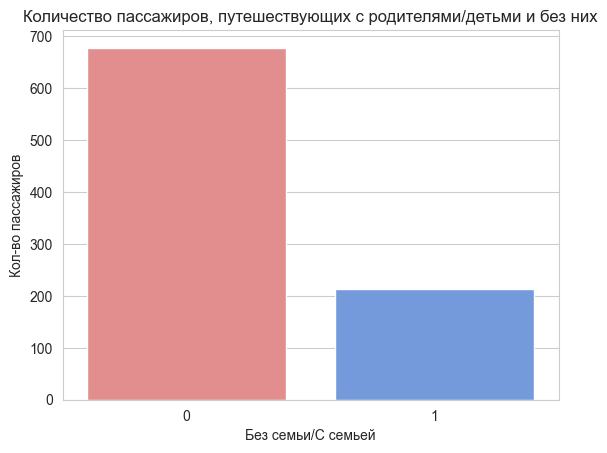

In [16]:
data = df.groupby('NotAlone')['PassengerId'].count().reset_index()

sns.barplot(data=data, x=data['NotAlone'], hue='NotAlone',
            y=data['PassengerId'], palette={0: 'lightcoral', 1: 'cornflowerblue'}, legend=False)

plt.ylabel('Кол-во пассажиров')
plt.xlabel('Без семьи/С семьей')
plt.title('Количество пассажиров, путешествующих с родителями/детьми и без них')
plt.show()

Пассажиров путешествующих без родителей и детей более, чем в два три раза больше, чем пассажиров, путешествующих с семьей.

**ВЫВОД:**

В среднем, пассажиры Титаника были молодыми людьми в возрасте от 16 до 36 лет. Преимущественно, такая картина складывается благодаря пассажирам самого многочисленного 3его класса. Там наблюдалось самое большое количество молодых пассажиров (как в процентном соотношении, так и в абсолютных значениях). 1ом и 2ом классе больше доли людей среднего возраста. В 1ом классе пожилых людей в процентном соотношении больше, чем в других классах. Детей больше всего в 3ем классе.

Мужчин на борту значительно больше, чем женщин - 64.8% мужчин против 35.2% женщин. Количество мужчин-пассажиров почти во всех возрастных группах превышает количество женщин.

Стоимость билетов в 1ый класс имеет больший разброс, чем во всех других классах. Встречаются аномальные значения: 
- очень дорогие билеты стоимостью до 500 у.е, при медианном значении в 60 у.е, 
- билеты с отрицательной стоимостью. 

Пассажиры чаще всего путешествуют без семей. При этом на борту также встречаются большие семьи. Так, семья Sage отправилась в путь в составе 8 человек.

## 3. Заполнение пропусков

На первом шаге мы определили наличие большого количества пропусков в столбцах с возрастом пассажиров и номером каюты. Пропуск в номерах каюты для целей исследования некритичен. Информацию о возрасте пассажиров попробуем восстановить, заменив пропуски медианными значениями по классам пассажиров. 

Для этого определим цикл, который будет заполнять пустые значения в каждой из пропущенных ячеек столбца медианным значением возраста для кадждого класса:

In [17]:
for cl in df['Pclass'].unique():
    
    median_age = df.loc[df['Pclass'] == cl, 'Age'].median()
    
    df.loc[df['Pclass'] == cl, 'Age'] = df.loc[df['Pclass'] == cl, 'Age'].fillna(median_age)

Делаем проверку:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WithSibSp    891 non-null    int64  
 13  NotAlone     891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


Пропуски заполнены.

**ВЫВОД:**

В столбцах с возрастом пассажиров и номером каюты было пропущено большое число значений. Пропуски в номерах кают для целей исследования некритичны. Информацию о возрасте пассажиров было принято решение восстановить, заменив пропуски медианными значениями по классам кают пассажиров. 

## 4. Отношения между переменными

Исследуем взаимосвязь между возрастом пассажиров и стоимостью их билетов. Для этого построим диаграмму рассеивания для этих величин:

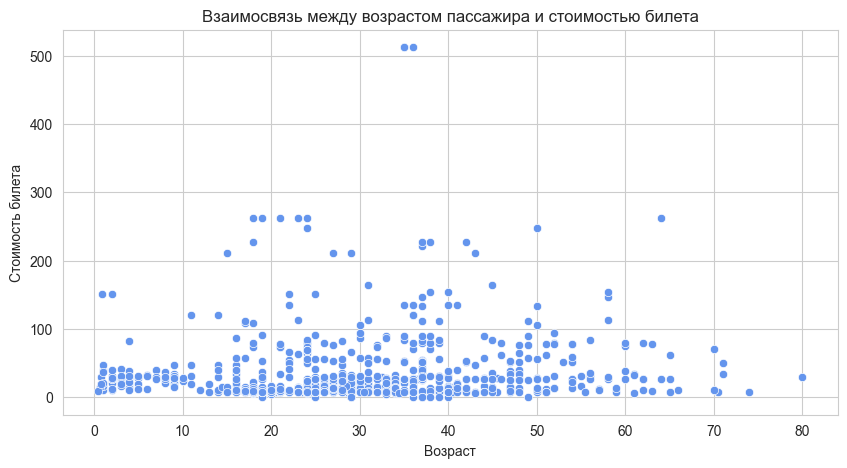

In [19]:
plt. figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Fare', color='cornflowerblue')
plt.ylabel('Стоимость билета')
plt.xlabel('Возраст')
plt.title('Взаимосвязь между возрастом пассажира и стоимостью билета')
plt.show()

Определенной тенденции во взаимосвязи возраста и стоимости билетов не наблюдается. Стоимость билетов для каждого возраста может значительно варьироваться. При этом,  с учетом преобладания 3его класса, большая часть билетов для всех возрастов не превышала 50 у.е. 

Теперь изучим взаимосвязь параметров пассажиров между собой, то есть посчитаем корреляцию числовых переменных: возраста пассажиров, стоимости их билетов, количества братьев/сестер/супругов на борту, количество сопровождающих пассажира родителей и детей. Посчитаем коэффициенты и визуализируем взаимосвязи с помощью тепловой карты:

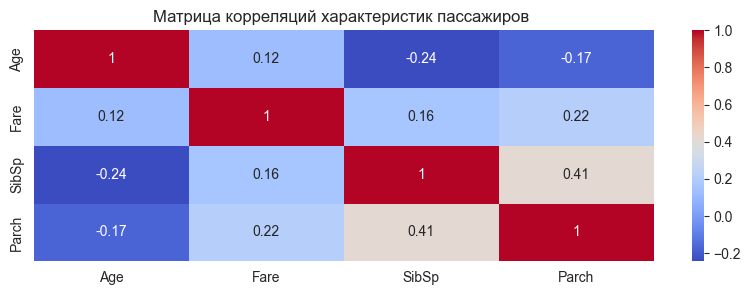

In [20]:
plt. figure(figsize=(10, 3))
sns.heatmap(data=df[['Age', 'Fare','SibSp', 'Parch']].corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций характеристик пассажиров ')
plt.show()

Для интерпретации результатов будем использовать шкалу Чеддока.

Почти все переменные слабо коррелируют друг с другом. Только между переменными Parch и SibSp наблюдается умеренная положительная корреляция. Таким образом, пассажиры, которые путешествовали с братьями/сестрами/супругами, с большей долей вероятности сопровождались также родителями и детьми. Сильной прямой взаимосвязи между какими-либо из этих 4ех параметров обнаружено не было. 

**ВЫВОД:**

Прямой взаимосвязи между возрастом и ценой билета обнаружено не было. 

Пассажиры, путешествующие с родителями или детьми, как правило, имеют на борту также братьев/сестер или муж/жён.

Сильной корреляции между параметрами пассажиров обнаружено не было.

## 5. «Портрет» пассажиров разных классов

Составим портреты пассажиров из разных классов, сравнив их по нескольким характиристикам.

Определим, каков средний возраст пассажиров в каждом классе.

In [21]:
df.pivot_table(index='Pclass', values='Age', aggfunc='mean')

,Age
Pclass,
1,38.062130
2,29.825163
3,24.824684


Как ранее уже было определено, наиболее молодые пассажиры передвигаются 3им классом. Пассажиры 2ого класса немного старше пассажиров 3его класса. Пассажиры 1ого класса в среднем значительно старше пассажиров других классов. Тем не менее, в среднем возраст пассажиров всех классов можно назвать довольно молодым.

Теперь посмотрим, как распределяется пол пассажиров в каждом классе.

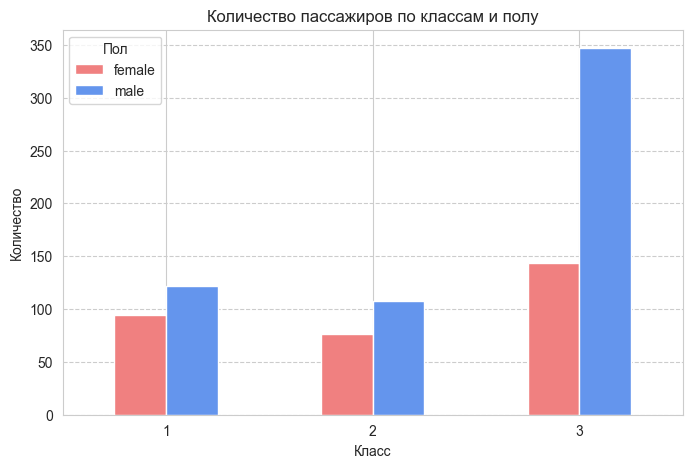

In [22]:
Sex_by_class = df.pivot_table(index='Pclass', values='PassengerId', columns='Sex', aggfunc='count')

Sex_by_class.plot(kind='bar', color=['lightcoral', 'cornflowerblue'], figsize=(8, 5))

plt.title('Количество пассажиров по классам и полу')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Пол')  
plt.grid(axis='y', linestyle='--') 
plt.xticks(rotation=0)

plt.show()

Во всех классах мужчины-пассажиры преобладают над женщинами-пассажирами. При этом наибольший разрыв между полами в 3ем классе. Там мужчин больше, чем женщин больше, чем в два раза. В 1ом и 2ом классе разница между количеством мужчин и женщин примерно одинаковая.

Далее изучим, как распределены порты посадки для пассажиров разных классов:

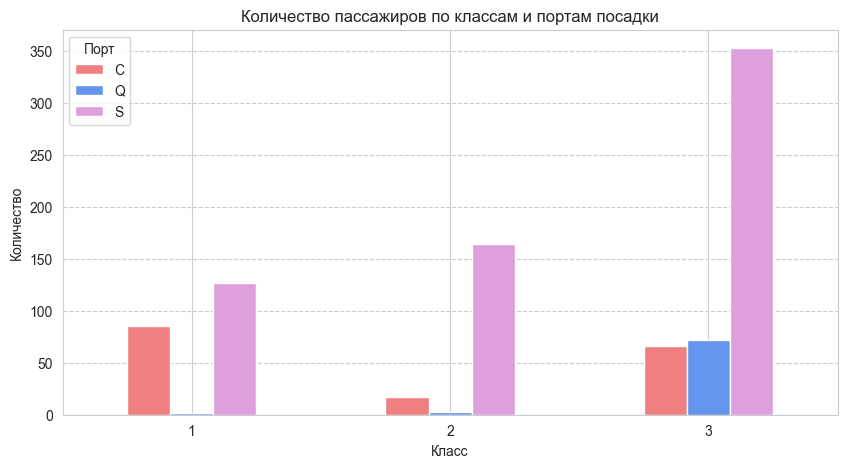

In [23]:
Port_by_class = df.pivot_table(index='Pclass', values='PassengerId', columns='Embarked', aggfunc='count')

Port_by_class.plot(kind='bar', color=['lightcoral', 'cornflowerblue', 'plum'], figsize=(10, 5))

plt.title('Количество пассажиров по классам и портам посадки')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Порт')  
plt.grid(axis='y', linestyle='--') 
plt.xticks(rotation=0)

plt.show()

Большая часть пассажиров во всех классах погрузилась на корабль в порту S. Наибольшая разница между пассажирами, взошедшими на борт в порту S и другими пассажирами, наблюдается в 3ем классе. Также большая разница между портом S и другими наблюдается во 2ом классе. В порту Q почти никто не подсел в 1ый и 2ой класс. В 3ем классе примерно одинаковое число пассажиров взошло на корабль в портах Q и C. 

Еще раз посмотрим, с какой частотой пассажиры путешествуют с братьями/сестрами или мужьями/жёнами, но разделив при этомпассажиров по классам:

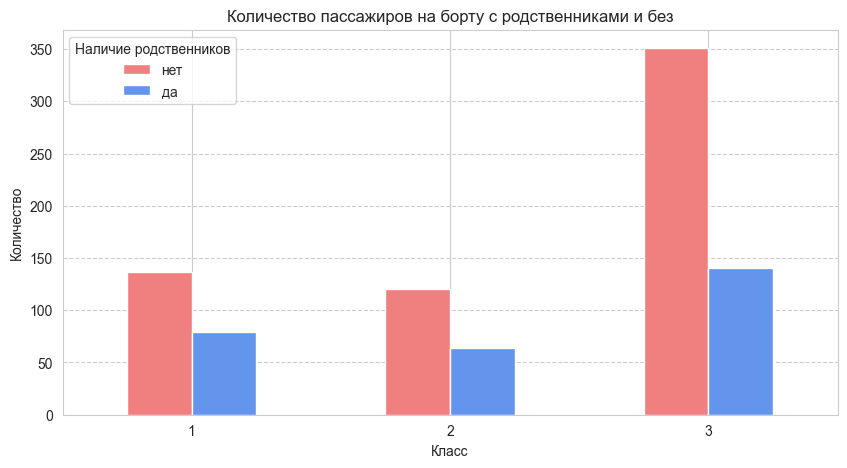

In [24]:
Rel_by_class = df.pivot_table(index='Pclass', values='PassengerId', columns='WithSibSp', aggfunc='count')

Rel_by_class .plot(kind='bar', color=['lightcoral', 'cornflowerblue'], figsize=(10, 5))

plt.title('Количество пассажиров на борту с родственниками и без')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='Наличие родственников', labels=['нет', 'да'])  
plt.grid(axis='y', linestyle='--') 
plt.xticks(rotation=0)

plt.show()

Пассажиры во всех классах чаще путешествуют без родственников. Однако, разница между количеством пассажиров без родственников и количеством пассажиров с родственниками в 3ем классе снова больше, чем в других классах. Меньше всего людей с родственниками путешествует во 2ом классе. Соотношение семейных и безсемейных пассажиров в 1ом и 2ом классе примерно одинаковое. 

**ВЫВОД:**

Самые молодые пассажиры путешествуют 3им классом, их средний возраст составляет 25 лет. Чуть старше пассажиры 2ого класса - им 30 лет. Самые взрослые пассажиры путешествуют первым классом - им в среднем 38 лет. В среднем возраст пассажиров всех классов можно назвать довольно молодым.

Во всех классах мужчины-пассажиры преобладают над женщинами-пассажирами. При этом наибольший разрыв между полами в 3ем классе. В 1ом и 2ом классе разница между количеством мужчин и женщин примерно одинаковая.

Большая часть пассажиров во всех классах погрузилась на корабль в порту S. Наибольшая разница между пассажирами, взошедшими на борт в порту S и другими пассажирами, наблюдается в 3ем классе. В порту Q почти никто не подсел в 1ый и 2ой класс. 

Пассажиры во всех классах чаще путешествуют без родственников. Наибольшая разница между количеством пассажиров без родственников и количеством пассажиров с родственниками наблюдается в 3ем классе. В 1ом и 2ом классе соотношение пассажиров, путешествующих с братьями/сестрами/супругами примерно одинаковое.

## 6. Тестирование гипотез

Исследуем, как те или иные пассажирские характеристики влияли на шансы выжить.

### 6.1 Выживаемость мужчин и женщин

Проверять зависимость вероятности выжить от пола пассажира будем с помощью хи-квадрат теста, так как пол и выживаемость - две категориальные переменные.

Сформулируем гипотезы для проведения теста:

- H0: Между полом пассажира и его выживаемостью нет статистически значимой связи 
- H1: Пол пассажира и его выживаемость связаны

Для применения теста нам сначала необходимо задать таблицу сопряженности, в которой будет рассчитана частота признака выживаемости для пассажиров разных полов:

In [25]:
data = df.pivot_table(values='PassengerId', index='Sex', columns='Survived', aggfunc='count')

data

Survived,0,1
Sex,,
female,81,233
male,468,109


По значениям в получившейся матрице можем сделать предположение, что связь между полом и выживаемостью заключается в том, что у женщин шансов на выживание значительно больше, чем у мужчин. Женщин выжило в 4 раза больше, чем погибло. У мужчин ситуация прямо противоположная.

Чтобы узнать, есть ли статистически значимая связь между факторами, применяем хи-квадрат тест:

In [26]:
α=0.05 #задаем уровень статистической значимости

chi2_stat, p_value, dof, expected = chi2_contingency(data)

print(f"Статистика хи-квадрат: {chi2_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы (dof): {dof}")
print("Ожидаемые частоты (если бы связи не было):\n", expected)

Статистика хи-квадрат: 260.717
p-value: 0.0000
Степени свободы (dof): 1
Ожидаемые частоты (если бы связи не было):
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


P-value ниже уровня статистической значимости, нулевая гипотеза отклонена. Ожидаемые частоты не совпали с фактическими. Между полом пассажиров и их выживаемостью есть связь.

### 6.2 Выживаемость пассажиров из 1ого и 3его классов

Аналогичным способом проверим наличие связи между классами кают пассажиров и их выживаемостью. Применение хи-квадрат теста обосновано тем, что класс и выживаемость - это две категориальные переменные.

Сформулируем гипотезы для проведения теста:

- H0: Между классом пассажира и его выживаемостью нет статистически значимой связи 
- H1: Класс каюты пассажира и его выживаемость связаны

Составим таблицу сопряженности:

In [27]:
data1 = df.pivot_table(values='PassengerId', index='Pclass', columns='Survived', aggfunc='count').drop(2)

data1

Survived,0,1
Pclass,,
1,80,136
3,372,119


Судя по матрице сопряженности, шансов на выживание в 1ом классе больше, чем в 3ем. Посмотрим, как оценит взаиимость тест хи-квадрат:

In [28]:
chi2_stat, p_value, dof, expected = chi2_contingency(data1)

print(f"Статистика хи-квадрат: {chi2_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы (dof): {dof}")
print("Ожидаемые частоты (если бы связи не было):\n", expected)

Статистика хи-квадрат: 95.893
p-value: 0.0000
Степени свободы (dof): 1
Ожидаемые частоты (если бы связи не было):
 [[138.09335219  77.90664781]
 [313.90664781 177.09335219]]


P-value ниже уровня статистической значимости, нулевая гипотеза отклонена. Ожидаемые частоты не совпали с фактическими. Если бы взимосвязи между классом и выживаемостью не было, количество погибших среди 1ого класса было бы значительно выше. Таким образом, между классом пассажира и его выживаемостью есть статистически значимая связь.

### 6.3 Выживаемость пассажиров разных возрастов

Для сравнения уровня выживаемости среди людей разных возрастов, поделим пассажиров на группы: дети - пассажиры до 18 лет и взрослые - пассажиры старше 18 лет. Для этого заведем в таблице еще один столбец, в котором определим принадлежность пассажира к той или иной группе:

In [29]:
df['Group']=df['Age'].apply(lambda x: 'дети' if x<18 else 'взрослые' )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WithSibSp,NotAlone,Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,взрослые
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,взрослые
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,взрослые
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,взрослые
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,взрослые
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,взрослые
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,взрослые
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,1,1,взрослые
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,взрослые


Так как принадлежность к возратсной группе и выживаемость - категориальные переменные, применим тест хи-квадрат еще раз.

Сформулируем гипотезы для проведения теста:

- H0: Между возрастом пассажира и его выживаемостью нет статистически значимой связи 
- H1: Возраст пассажира и его выживаемость связаны

И составим таблицу сопряженности:

In [30]:
data2 = df.pivot_table(values='PassengerId', index='Group', columns='Survived', aggfunc='count')

data2

Survived,0,1
Group,,
взрослые,497,281
дети,52,61


Судя по частотам приведенным в таблице, взрослые погибали чаще, чем дети. Проверим, есть ли статистически значимая связь между возрастной группой и выжимаемостью:

In [31]:
chi2_stat, p_value, dof, expected = chi2_contingency(data2)

print(f"Статистика хи-квадрат: {chi2_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы (dof): {dof}")
print("Ожидаемые частоты (если бы связи не было):\n", expected)

Статистика хи-квадрат: 12.569
p-value: 0.0004
Степени свободы (dof): 1
Ожидаемые частоты (если бы связи не было):
 [[479.37373737 298.62626263]
 [ 69.62626263  43.37373737]]


P-value ниже уровня статистической значимости 0,05, нулевая гипотеза отклонена. Ожидаемые частоты ближе к фактическим, чем в предыдущих тестах, но не совпали. Если бы взимосвязи между возрастной группой и выживаемостью не было, количество погибших среди детей выше. Таким образом, между возрастом пассажира и его выживаемостью есть статистически значимая связь.

### 6.3 Сравнение возраста выживших и погибших пассажиров

Также для проверки связи между возрастом пассажиров и их выживаемостью, сравним возраст выживших и погибших пассажиров. Сравнивать будем используя двухвыборочный t-test.

Перед сравнением посчитаем средний возраст для каждой из групп:

In [32]:
data3 = df.pivot_table(values='Age', index='Survived', aggfunc='mean')

data3

,Age
Survived,
0,29.560109
1,28.273889


Судя по получившимся значеним, средний возраст погибших пассажиров выше среднего возраста выживших. Исходя из этого, сформулируем гипотезы для проведения теста:

- H0: Средний возраст погибших пассажиров больше среднего возраста выживших пассажиров 
- H1: Средний возраст выживших и погибших пассажиров не равны

In [33]:
t_statistic, p_value = ttest_ind(df.loc[df['Survived']==0, 'Age'],df.loc[df['Survived']==1, 'Age'], 
                                 alternative='greater')

print(f"t_statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.4f}")

t_statistic: 1.411
p-value: 0.0794


P-value выше уровня статистической значимости 0,05, нулевая гипотеза не может быть отклонена. Таким образом, возраст погибших пассажиров статистически значимо больше возраста выживших пассажиров. Однако, с учетом того, что разница между средними очень мала, будем считать, что возраст не имеет критического влияния на выживаемость.

**ВЫВОД:**

Выживаемость среди женщин статистически значимо больше выживаемости среди мужчин. Вероятно, причина в том, что спасаться предлагалось в первую очередь женщинам и детям. 

Также, в сравнении с 3им классом, статистически более высокой выживаемостью обладают пассажиры 1ого класса.

Взрослые погибали чаще детей. 

## Вывод

На вход был получен датасет с данными о пассажирах Титаника, состоящий из 891 строки.

В столбцах с возрастом пассажиров и номером каюты было пропущено 177 и 687 строк соответственно. Информацию о возрасте пассажиров было принято решение восстановить, заменив пропуски медианными значениями по классам кают пассажиров. Пропуски с номерами кают оставили без изменений.

Исследовательский анализ показал, что пассажиры Титаника были преимущественно молодыми людьми в возрасте от 16 до 36 лет. Самые молодые пассажиры путеществовали 3им классом, их средний возраст составлял 25 лет. Самые взрослые пассажиры путешествовали первым классом - им в среднем было около 38 лет. 1ом и 2ом классе больше доли людей среднего возраста. В 1ом классе пожилых людей в процентном соотношении больше, чем в других классах. Детей больше всего в 3ем классе. 

В целом, наибольшее число пассажиров перевозилось в 3ем классе.

Мужчин на лайнере было почти в два раза больше, чем женщин. Мужчины-пассажиры преобладали над женщинами-пассажирами во всех классах и во всех возрастных группах. При этом наибольший разрыв между полами наблюдался в 3ем классе.

Пассажиры во всех классах чаще путешествовали без родственников. 

Факторы повлиявшие на выживаемость: пол,класс каюты пассажира и принадлежность к возрастной группе. Выживаемость среди женщин статистически значимо больше выживаемости среди мужчин. В сравнении с 3им классом, статистически более высокой выживаемостью обладают пассажиры 1ого класса. Также, выживаемость среди детей сильно выше, чем среди взрослых. Вероятно, причина в том, что спасаться предлагалось в первую очередь женщинам и детям. 